In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
haberman=pd.read_csv('/content/drive/MyDrive/APPLIED AI ASSIGNMENTS ipynb/haberman.csv')
pd.DataFrame(haberman)
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
##Class Distribution there is  a slight class imbalance with biased towards class=1
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [4]:
haberman.describe()
##NO. OF NODES HAS OUTLIERS AND OPERATION YEAR HAS LOW SPREAD .

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
haberman.info()
#There are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### **GRAPHICAL UNIVARIATE ANALYSIS ***

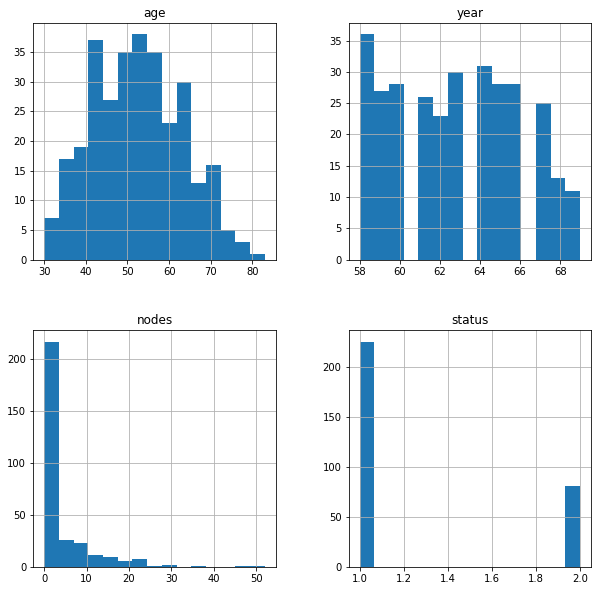

In [6]:
haberman.hist (bins=15,figsize=(10,10) ,grid=True)
#plt.title('Histograms')
plt.show()

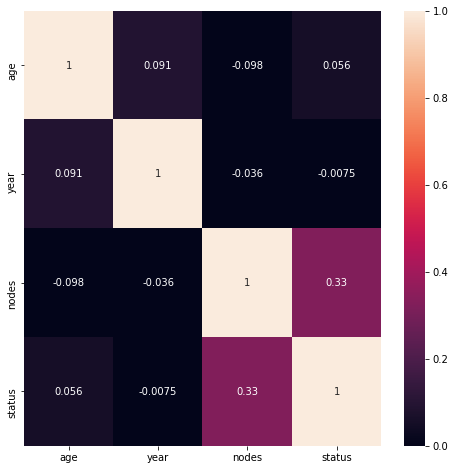

In [7]:
fig,ax=plt.subplots(figsize=(8,8))
correlation=haberman.corr(method='spearman', )
sns.heatmap(correlation,annot=True,vmin=0,vmax=1)
plt.show()
#survival_status has a positive correlation with axil_nodes while age and op_year has no correlation with the survival rates.


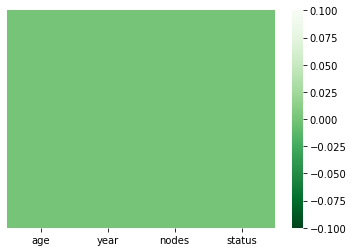

In [8]:
import seaborn as sns
sns.heatmap(haberman.isna(), yticklabels=False,cbar=True,cmap='Greens_r')
plt.show()
#luckily got no missing values.

### **PAIRPLOT(BIVARIATE ANALYSYS)**

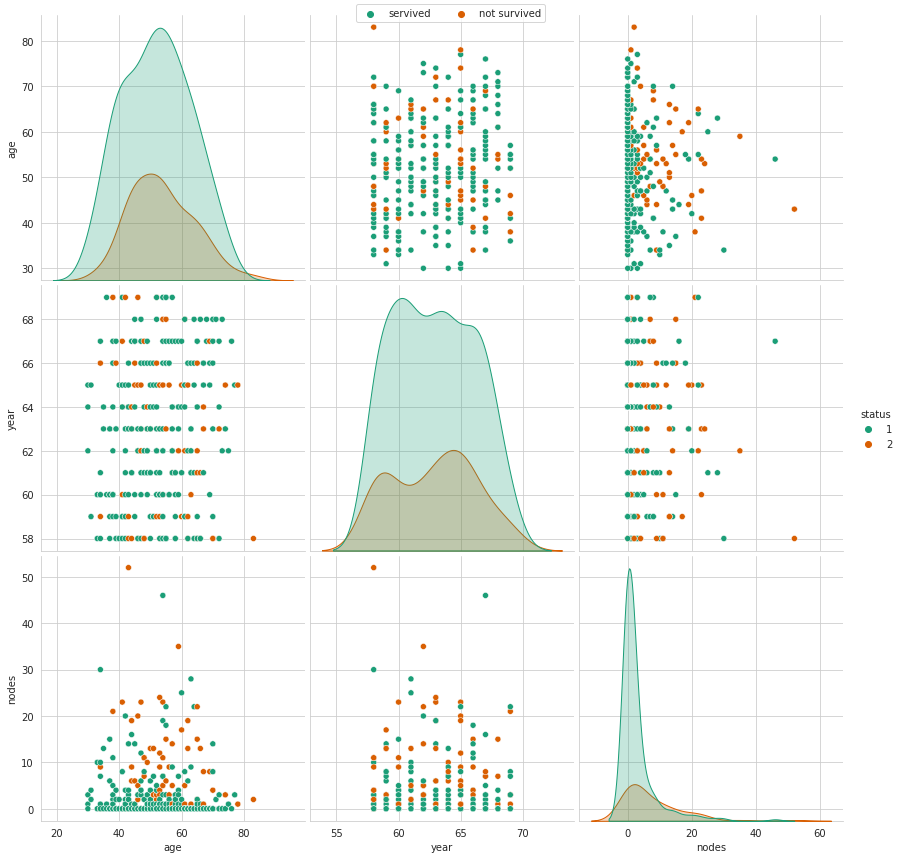

In [9]:
import warnings
warnings.filterwarnings("ignore") 
sns.set_style("whitegrid")
palette = sns.color_palette("Accent")
g=sns.pairplot(haberman,hue='status',size=4,kind='scatter',palette='Dark2')
handles = g._legend_data.values()
labels = g._legend_data.keys()
#g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
#g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
g.fig.legend(handles=handles, labels=['servived','not survived'], loc='upper center', ncol=3)
plt.show()
##all the pairplots has points non linearly separable and shows no such statistically significance with Survival_Status
##no of nodes is less in the age group less than 40 but above 40 nodes increases and survival status seem to have reduced drastically till the age  near 80

# BOX PLOT


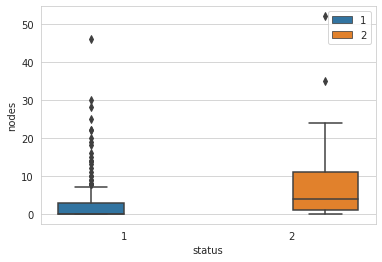

In [10]:
sns.boxplot(x='status',y='nodes',data=haberman,hue='status')
plt.legend(loc='upper right')
plt.show()
##high node number have seen most cases for non survival which mean person have high nodes are less likely to survive than those of who have lesser no. of nodes.

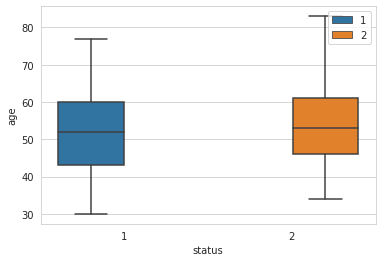

In [11]:
sns.boxplot(x='status',y='age',data=haberman,hue='status')
plt.legend(loc='upper right')
plt.show()
##age is not a statistically significant parameter for survival_status as the middle quartiles and upper quatiles are not verry far in survival and non survival cases. 

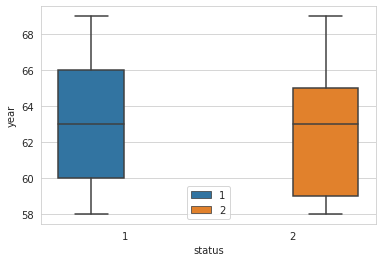

In [12]:
sns.boxplot(x='status',y='year',data=haberman,hue='status')
plt.legend(loc='best')
plt.show()
##As the correlation heatmap projects, same can be seen here OP_year has no or verry little statistical significance
##people who did't servive have their quartile range in slightly younger age group than those of who are but the median age is same in both the cases.

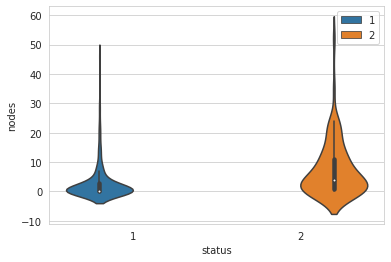

In [13]:
sns.violinplot(x='status',y='nodes',data=haberman,hue='status')
plt.legend(loc='upper right')
plt.show()

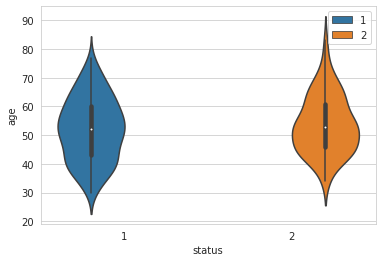

In [14]:
sns.violinplot(x='status',y='age',data=haberman,hue='status')
plt.legend(loc='upper right')
plt.show()
# As in the boxplot distribution looks similar in both classes hence age may not be useful cariteria with survival rate

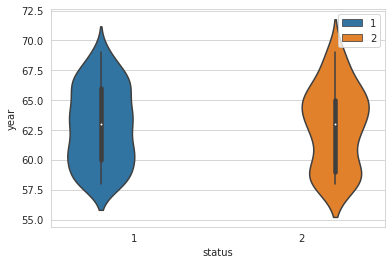

In [15]:
import warnings
warnings.filterwarnings("ignore") 
sns.violinplot(x='status',y='year',data=haberman,hue='status')
plt.legend()
plt.show()

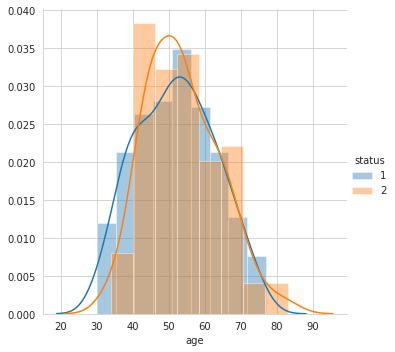

In [16]:
import warnings
warnings.filterwarnings("ignore") 
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show()
#Age is not a significant parameter to differentiate between survived and not survived class

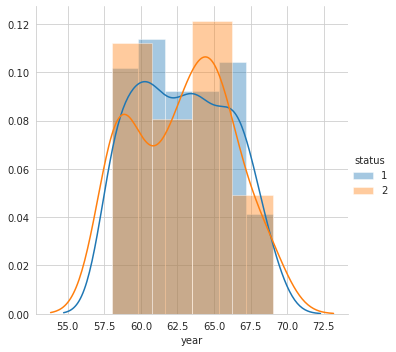

In [17]:
import warnings
warnings.filterwarnings("ignore") 
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();
#plots are too much overlap hence rule based system cant be established

#PMF & CDF

PMF:
 [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF:
 [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


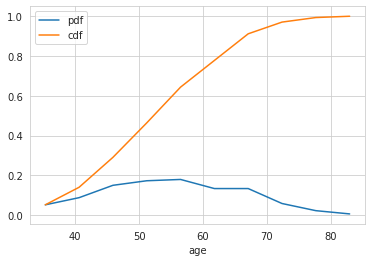

In [18]:
##PMF AND CDF FOR AGE
plt.grid()
pmf,bins=np.histogram(haberman['age'],bins=10,density=True)
pmf =pmf/sum(pmf)
print("PMF:\n",pmf)
#print(bins)
cdf=np.cumsum(pmf)
print("CDF:\n",cdf)
plt.grid()
plt.plot(bins[1:],pmf)
plt.plot(bins[1:],cdf)
plt.xlabel('age')
plt.legend( ("pdf","cdf"))
plt.show()

#As we can see 100% peaple have age less than 82.70-75% people have age less than or equal to 60
#Same Results can be replicated in high level statistics above

PMF [0.11764706 0.08823529 0.09150327 0.08496732 0.0751634  0.09803922
 0.10130719 0.09150327 0.09150327 0.08169935 0.04248366 0.03594771]
CDF [0.11764706 0.20588235 0.29738562 0.38235294 0.45751634 0.55555556
 0.65686275 0.74836601 0.83986928 0.92156863 0.96405229 1.        ]


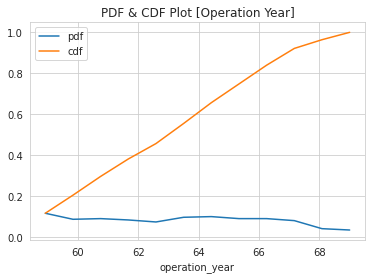

In [21]:
plt.grid()
pmf,bins=np.histogram(haberman['year'],bins=12,density=True)
pmf =pmf/sum(pmf)
print("PMF",pmf)
#print(bins)
cdf=np.cumsum(pmf)
print("CDF",cdf)
plt.grid()
plt.plot(bins[1:],pmf)
plt.plot(bins[1:],cdf)
plt.xlabel('operation_year')
plt.title('PDF & CDF Plot [Operation Year]')
plt.legend( ("pdf","cdf"))
plt.show()
## More than 60% people have operation year less than equal to 64
##Similarly in case of 66year ---aprox 81-82% 

PMF [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


Text(0.5, 0, 'nodes')

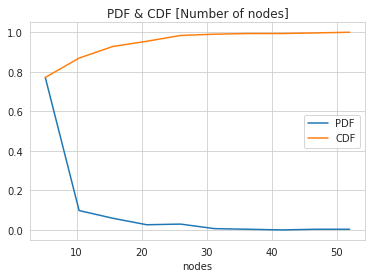

In [22]:
plt.grid()
pmf,bins=np.histogram(haberman['nodes'],bins=10,density=True)
pmf =pmf/sum(pmf)
print("PMF",pmf)
#print(bins)
cdf=np.cumsum(pmf)
print("CDF",cdf)
plt.grid()
plt.plot(bins[1:],pmf,label='PDF')
plt.plot(bins[1:],cdf,label='CDF')
plt.legend((("PDF","CDF")))
plt.title("PDF & CDF [Number of nodes]")
plt.xlabel('nodes')
#Almost 80% people have less than 5 nodes

Age PMF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]

Age CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]

PMF Operation year: [0.11764706 0.08823529 0.09150327 0.08496732 0.0751634  0.09803922
 0.10130719 0.09150327 0.09150327 0.08169935 0.04248366 0.03594771]

CDF Operation year: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]

Number of nodes: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]

CDF number of nodes: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


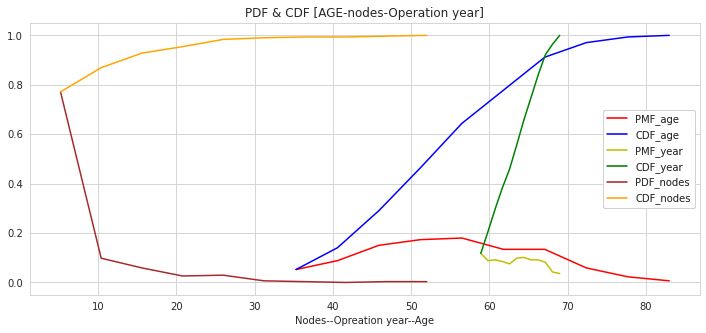

In [25]:
##AGE
plt.figure(figsize=(12,5))
pmf1,bins=np.histogram(haberman['age'],bins=10,density=True)
pmf1 =pmf1/sum(pmf1)
print("Age PMF:",pmf1)
#print(bins)
cdf1=np.cumsum(pmf1)
print("\nAge CDF:",cdf1)
p1=plt.plot(bins[1:],pmf1,'r',label='PMF_age')
p2=plt.plot(bins[1:],cdf1,'b',label='CDF_age')


##OPERATION YEAR
pmf2,bins=np.histogram(haberman['year'],bins=12,density=True)
pmf2 =pmf2/sum(pmf2)
print("\nPMF Operation year:",pmf2)
#print(bins)
cdf2=np.cumsum(pmf2)
print("\nCDF Operation year:",cdf)

p3=plt.plot(bins[1:],pmf2,'y',label='PMF_year')
p4=plt.plot(bins[1:],cdf2,'g',label="CDF_year")


##NODES
pmf3,bins=np.histogram(haberman['nodes'],bins=10,density=True)
pmf3 =pmf3/sum(pmf3)
print("\nNumber of nodes:",pmf3)
#print(bins)
cdf3=np.cumsum(pmf3)
print("\nCDF number of nodes:",cdf3)

plt.plot(bins[1:],pmf3,'brown',label="PDF_nodes")
plt.plot(bins[1:],cdf3,'orange',label="CDF_nodes")
L3=plt.legend(loc='right bottom')
plt.gca().add_artist(L3)
plt.title('PDF & CDF [AGE-nodes-Operation year]')
plt.xlabel('Nodes--Opreation year--Age')
plt.show()


In [ ]:
Conclusion:
1)Class Distribution there is  a slight class imbalance with biased towards class=1
2)survival_status has a positive correlation with axil_nodes while age and op_year has no correlation with the survival rates.
3)all the pairplots has points non linearly separable and shows no such statistically significance with Survival_Status
4)no of nodes is less in the age group less than 40 but above 40 nodes increases and survival status seem to have reduced drastically as we go to the age near 80.
5)high node number have seen most cases for non survival which mean person have high nodes are less likely/
 to survive than those of who have lesser no. of nodes.
6)age is not a statistically significant parameter for survival_status as the middle quartiles and upper quatiles are not /
verry far in survival and non survival cases.
7)As the correlation heatmap projects, same can be seen here OP_year has no or verry little statistical significance
8)people who did not servive have their quartile range in slightly younger age group than those of who dide but the median age is same in both the cases.
9)As we can see 100% people have age less than 82.70-75% people have age less than or equal to 60/
Same Results can be replicated in high level statistics above
10) More than 60% people have operation year less than equal to 64,Similarly in case of 66year it is  81-82% and Almost 80% people have less than 5 nodes.